# Exploratory Data Analysis (EDA)

# Import Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
print("EXPLORATORY DATA ANALYSIS (EDA)")

EXPLORATORY DATA ANALYSIS (EDA)


In [3]:
plt.style.use('default') 
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 10
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
%matplotlib inline

In [4]:
import os
os.makedirs("../data/visualizations",exist_ok=True)
print("Directory Created: ../data/visualizations")

Directory Created: ../data/visualizations


# Load Cleaned Dataset

In [5]:
df=pd.read_csv("../data/processed/crop_data_cleaned.csv")

In [6]:
print("\n Data loaded successfully")
print(f"Shape: {df.shape}")
print(f"\nColumns:{list(df.columns)}")
print(f"\nFirst 5 rows:\n{df.head()}")


 Data loaded successfully
Shape: (2200, 8)

Columns:['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

First 5 rows:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [7]:
features=["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
target="label"

In [8]:
print(f"\n Features:{len(features)}")
print(f"Target:{target}")


 Features:7
Target:label


# Dataset Overview Statistics

In [9]:
print("\n1. BASIC STATISTICS:")
print(df[features].describe().T)


1. BASIC STATISTICS:
              count        mean        std        min        25%        50%  \
N            2200.0   50.551818  36.917334   0.000000  21.000000  37.000000   
P            2200.0   53.362727  32.985883   5.000000  28.000000  51.000000   
K            2200.0   48.149091  50.647931   5.000000  20.000000  32.000000   
temperature  2200.0   25.616244   5.063749   8.825675  22.769375  25.598693   
humidity     2200.0   71.481779  22.263812  14.258040  60.261953  80.473146   
ph           2200.0    6.469480   0.773938   3.504752   5.971693   6.425045   
rainfall     2200.0  103.463655  54.958389  20.211267  64.551686  94.867624   

                    75%         max  
N             84.250000  140.000000  
P             68.000000  145.000000  
K             49.000000  205.000000  
temperature   28.561654   43.675493  
humidity      89.948771   99.981876  
ph             6.923643    9.935091  
rainfall     124.267508  298.560117  


In [10]:
print("\n2. Data Distribution Summary")
for feature in features:
    print(f"\n{feature}")
    print(f"Range:[{df[feature].min()}, {df[feature].max()}]")
    print(f"Mean: {df[feature].mean():.2f}")
    print(f"Median: {df[feature].median():.2f}")
    print(f"Mode: {df[feature].mode()[0]:.2f}")
    print(f"Standard Deviation: {df[feature].std():.2f}")
    print(f"Variance: {df[feature].var():.2f}")
    print(f"Skewness: {df[feature].skew():.2f}")
    print(f"Kurtosis: {df[feature].kurtosis():.2f}")


2. Data Distribution Summary

N
Range:[0, 140]
Mean: 50.55
Median: 37.00
Mode: 22.00
Standard Deviation: 36.92
Variance: 1362.89
Skewness: 0.51
Kurtosis: -1.06

P
Range:[5, 145]
Mean: 53.36
Median: 51.00
Mode: 60.00
Standard Deviation: 32.99
Variance: 1088.07
Skewness: 1.01
Kurtosis: 0.86

K
Range:[5, 205]
Mean: 48.15
Median: 32.00
Mode: 17.00
Standard Deviation: 50.65
Variance: 2565.21
Skewness: 2.38
Kurtosis: 4.45

temperature
Range:[8.825674745, 43.67549305]
Mean: 25.62
Median: 25.60
Mode: 8.83
Standard Deviation: 5.06
Variance: 25.64
Skewness: 0.18
Kurtosis: 1.23

humidity
Range:[14.25803981, 99.98187601]
Mean: 71.48
Median: 80.47
Mode: 14.26
Standard Deviation: 22.26
Variance: 495.68
Skewness: -1.09
Kurtosis: 0.30

ph
Range:[3.504752314, 9.93509073]
Mean: 6.47
Median: 6.43
Mode: 3.50
Standard Deviation: 0.77
Variance: 0.60
Skewness: 0.28
Kurtosis: 1.66

rainfall
Range:[20.21126747, 298.5601175]
Mean: 103.46
Median: 94.87
Mode: 20.21
Standard Deviation: 54.96
Variance: 3020.42
Ske

# Visualization 1  Distribution of All Features (Histograms)

VISUALIZATION 1: FEATURE DISTRIBUTIONS (Histograms)

Saved: 01_feature_distributions_histogram.png


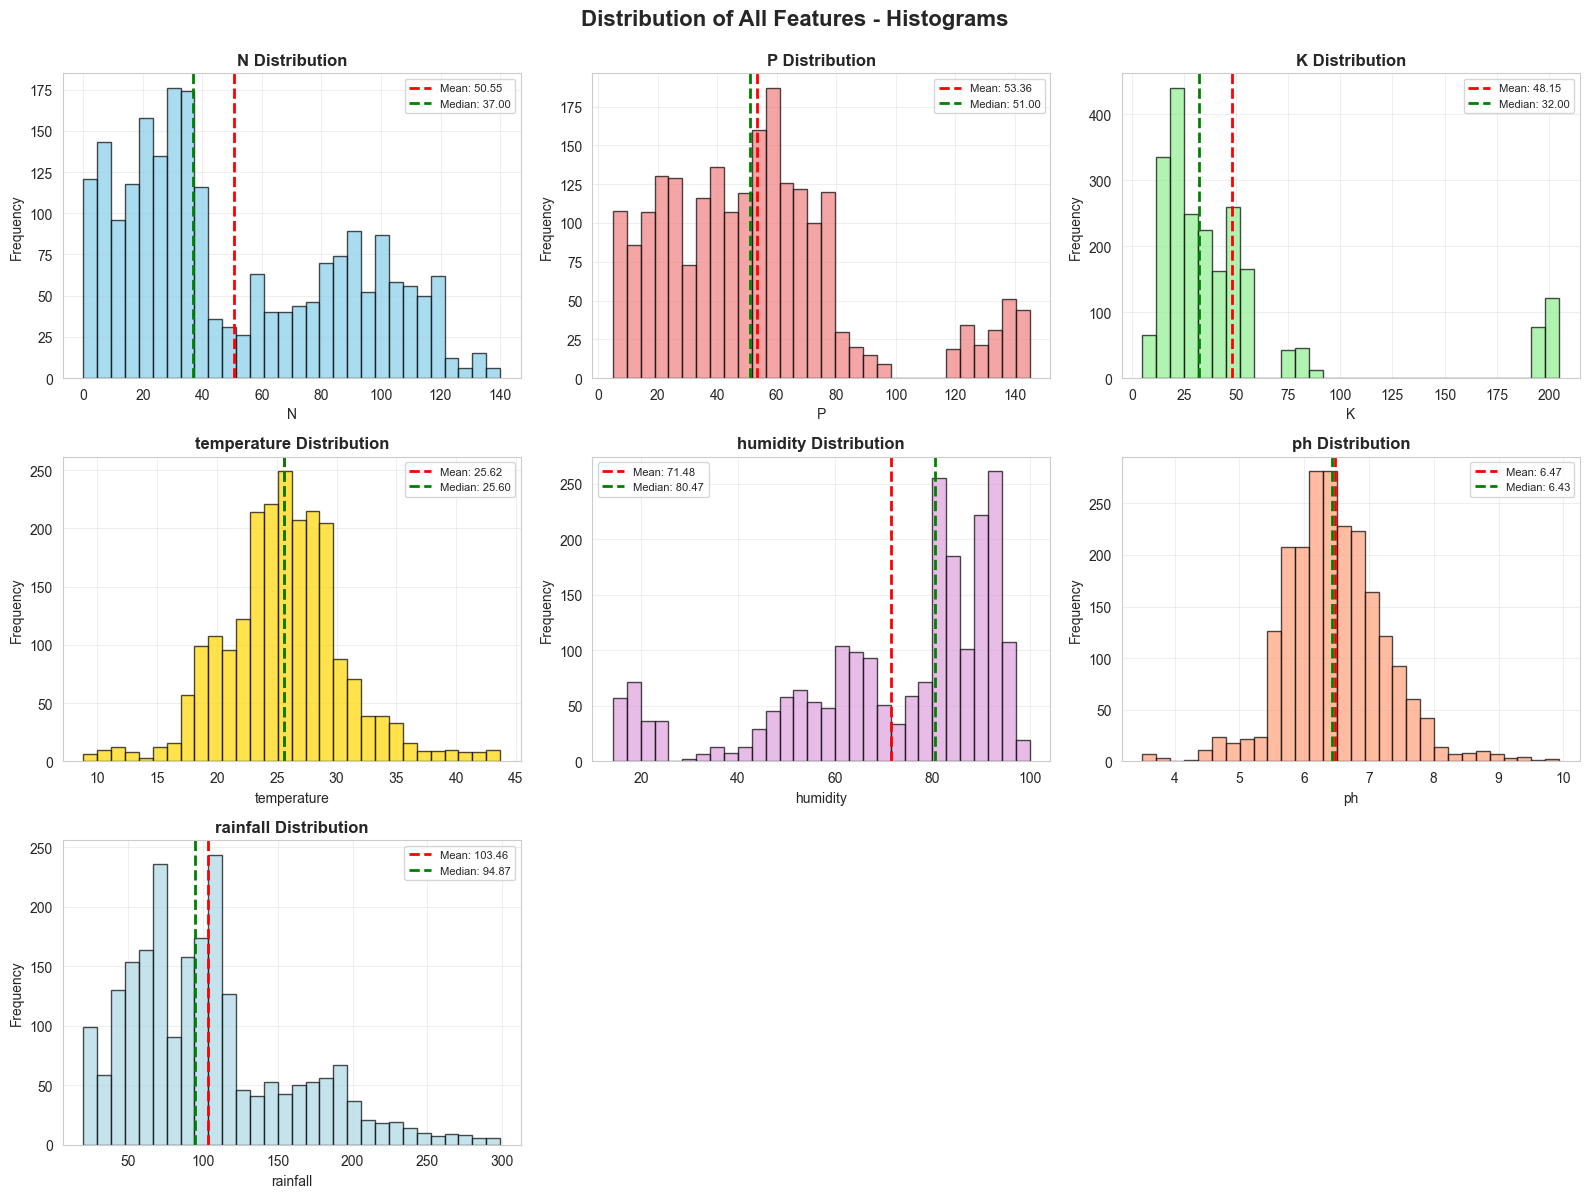

In [11]:
print("VISUALIZATION 1: FEATURE DISTRIBUTIONS (Histograms)")

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
fig.suptitle('Distribution of All Features - Histograms', fontsize=16, fontweight='bold', y=0.995)

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'lightsalmon', 'lightblue']

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    
    axes[row, col].hist(df[feature], bins=30, color=colors[idx], edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'{feature} Distribution', fontweight='bold')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    
    axes[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row, col].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[row, col].legend(fontsize=8)
    axes[row, col].grid(True, alpha=0.3)

for idx in range(len(features), 9):
    row = idx // 3
    col = idx % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.savefig('../data/visualizations/01_feature_distributions_histogram.png', dpi=300, bbox_inches='tight')
print("\nSaved: 01_feature_distributions_histogram.png")
plt.show()


# Visualization 2 - Box Plots for All Features

In [12]:
print("Visualization 2: FEATURE DISTRIBUTIONS (Box Plots)")

Visualization 2: FEATURE DISTRIBUTIONS (Box Plots)



Saved: 02_feature_boxplots.png


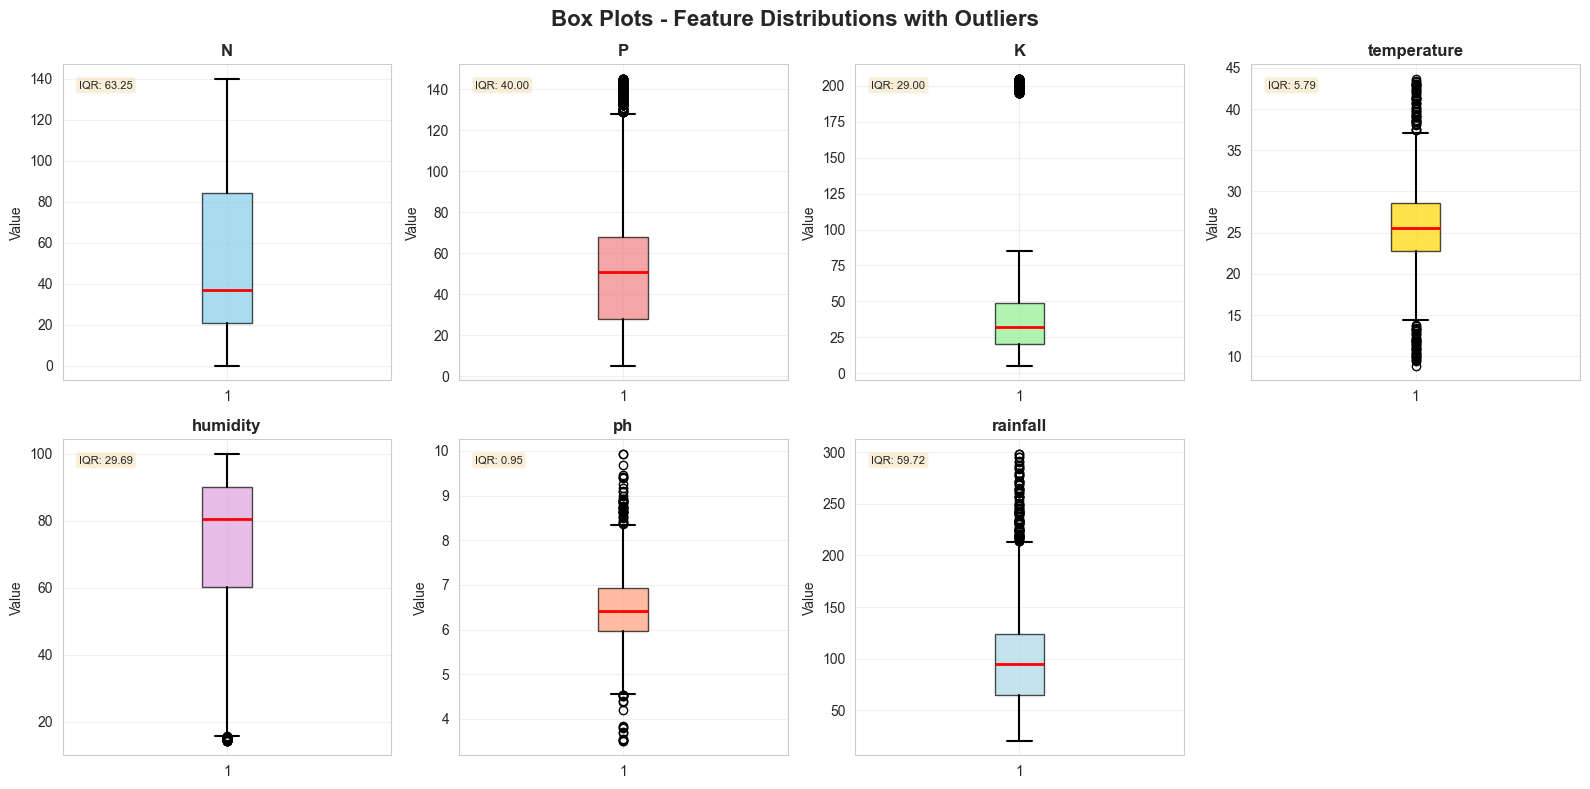

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Box Plots - Feature Distributions with Outliers', fontsize=16, fontweight='bold')

for idx, feature in enumerate(features):
    row = idx // 4
    col = idx % 4
    
    bp = axes[row, col].boxplot(df[feature], vert=True, patch_artist=True,
                                  boxprops=dict(facecolor=colors[idx], alpha=0.7),
                                  medianprops=dict(color='red', linewidth=2),
                                  whiskerprops=dict(color='black', linewidth=1.5),
                                  capprops=dict(color='black', linewidth=1.5))
    
    axes[row, col].set_title(f'{feature}', fontweight='bold')
    axes[row, col].set_ylabel('Value')
    axes[row, col].grid(True, alpha=0.3)
    
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    axes[row, col].text(0.05, 0.95, f'IQR: {iqr:.2f}', transform=axes[row, col].transAxes,
                        fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
fig.delaxes(axes[1, 3])

plt.tight_layout()
plt.savefig('../data/visualizations/02_feature_boxplots.png', dpi=300, bbox_inches='tight')
print("\nSaved: 02_feature_boxplots.png")
plt.show()

# Visualization 3 - Correlation Heatmap

In [14]:
print("Visualization 3: Correlation Heatmap")

Visualization 3: Correlation Heatmap


In [15]:
correlation_matrix=df[features].corr()
print(f"\n Correlation Matrix{correlation_matrix}")


 Correlation Matrix                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  



Saved: 03_correlation_heatmap.png


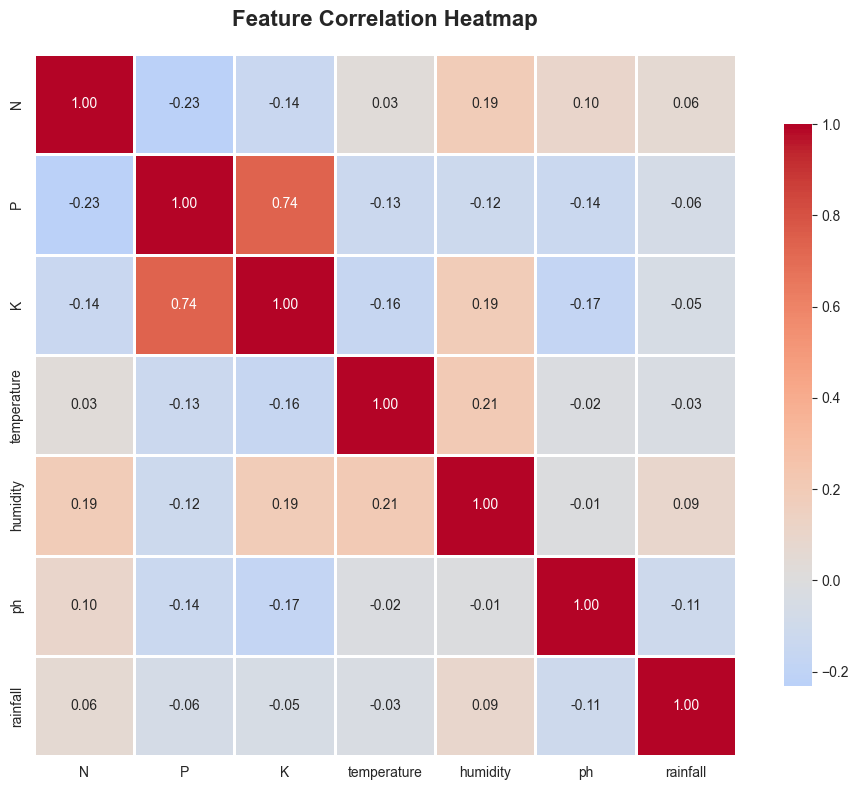

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",center=0,square=True,linewidths=1,cbar_kws={"shrink": 0.8})
plt.title("Feature Correlation Heatmap",fontsize=16,fontweight="bold",pad=20)
plt.tight_layout()
plt.savefig("../data/visualizations/03_correlation_heatmap.png",dpi=300,bbox_inches="tight")
print("\nSaved: 03_correlation_heatmap.png")
plt.show()

In [17]:
# Find highly correlated pairs
print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")

high_corr_pairs = []
for i in range(len(features)):
    for j in range(i+1,len(features)):
        corr_val=correlation_matrix.iloc[i,j]
        if abs(corr_val)>0.5:
            high_corr_pairs.append((features[i],features[j],corr_val))
            print(f"{features[i]:12} - {features[j]:12} : {corr_val:6.3f}")

if len(high_corr_pairs)==0:
    print("No highly correlated feature pairs found.")


Highly Correlated Feature Pairs (|correlation| > 0.7):
P            - K            :  0.736


# Visualization 4 - Pair Plot (Scatter Matrix)

In [18]:
print("Visualization 4: Pair Plot (Scatter Matrix)")

Visualization 4: Pair Plot (Scatter Matrix)


In [19]:
sample_df=df.sample(n=500, random_state=42)


 Creating pair plot with sample of 500 records

Saved: 04_pairplot_features.png


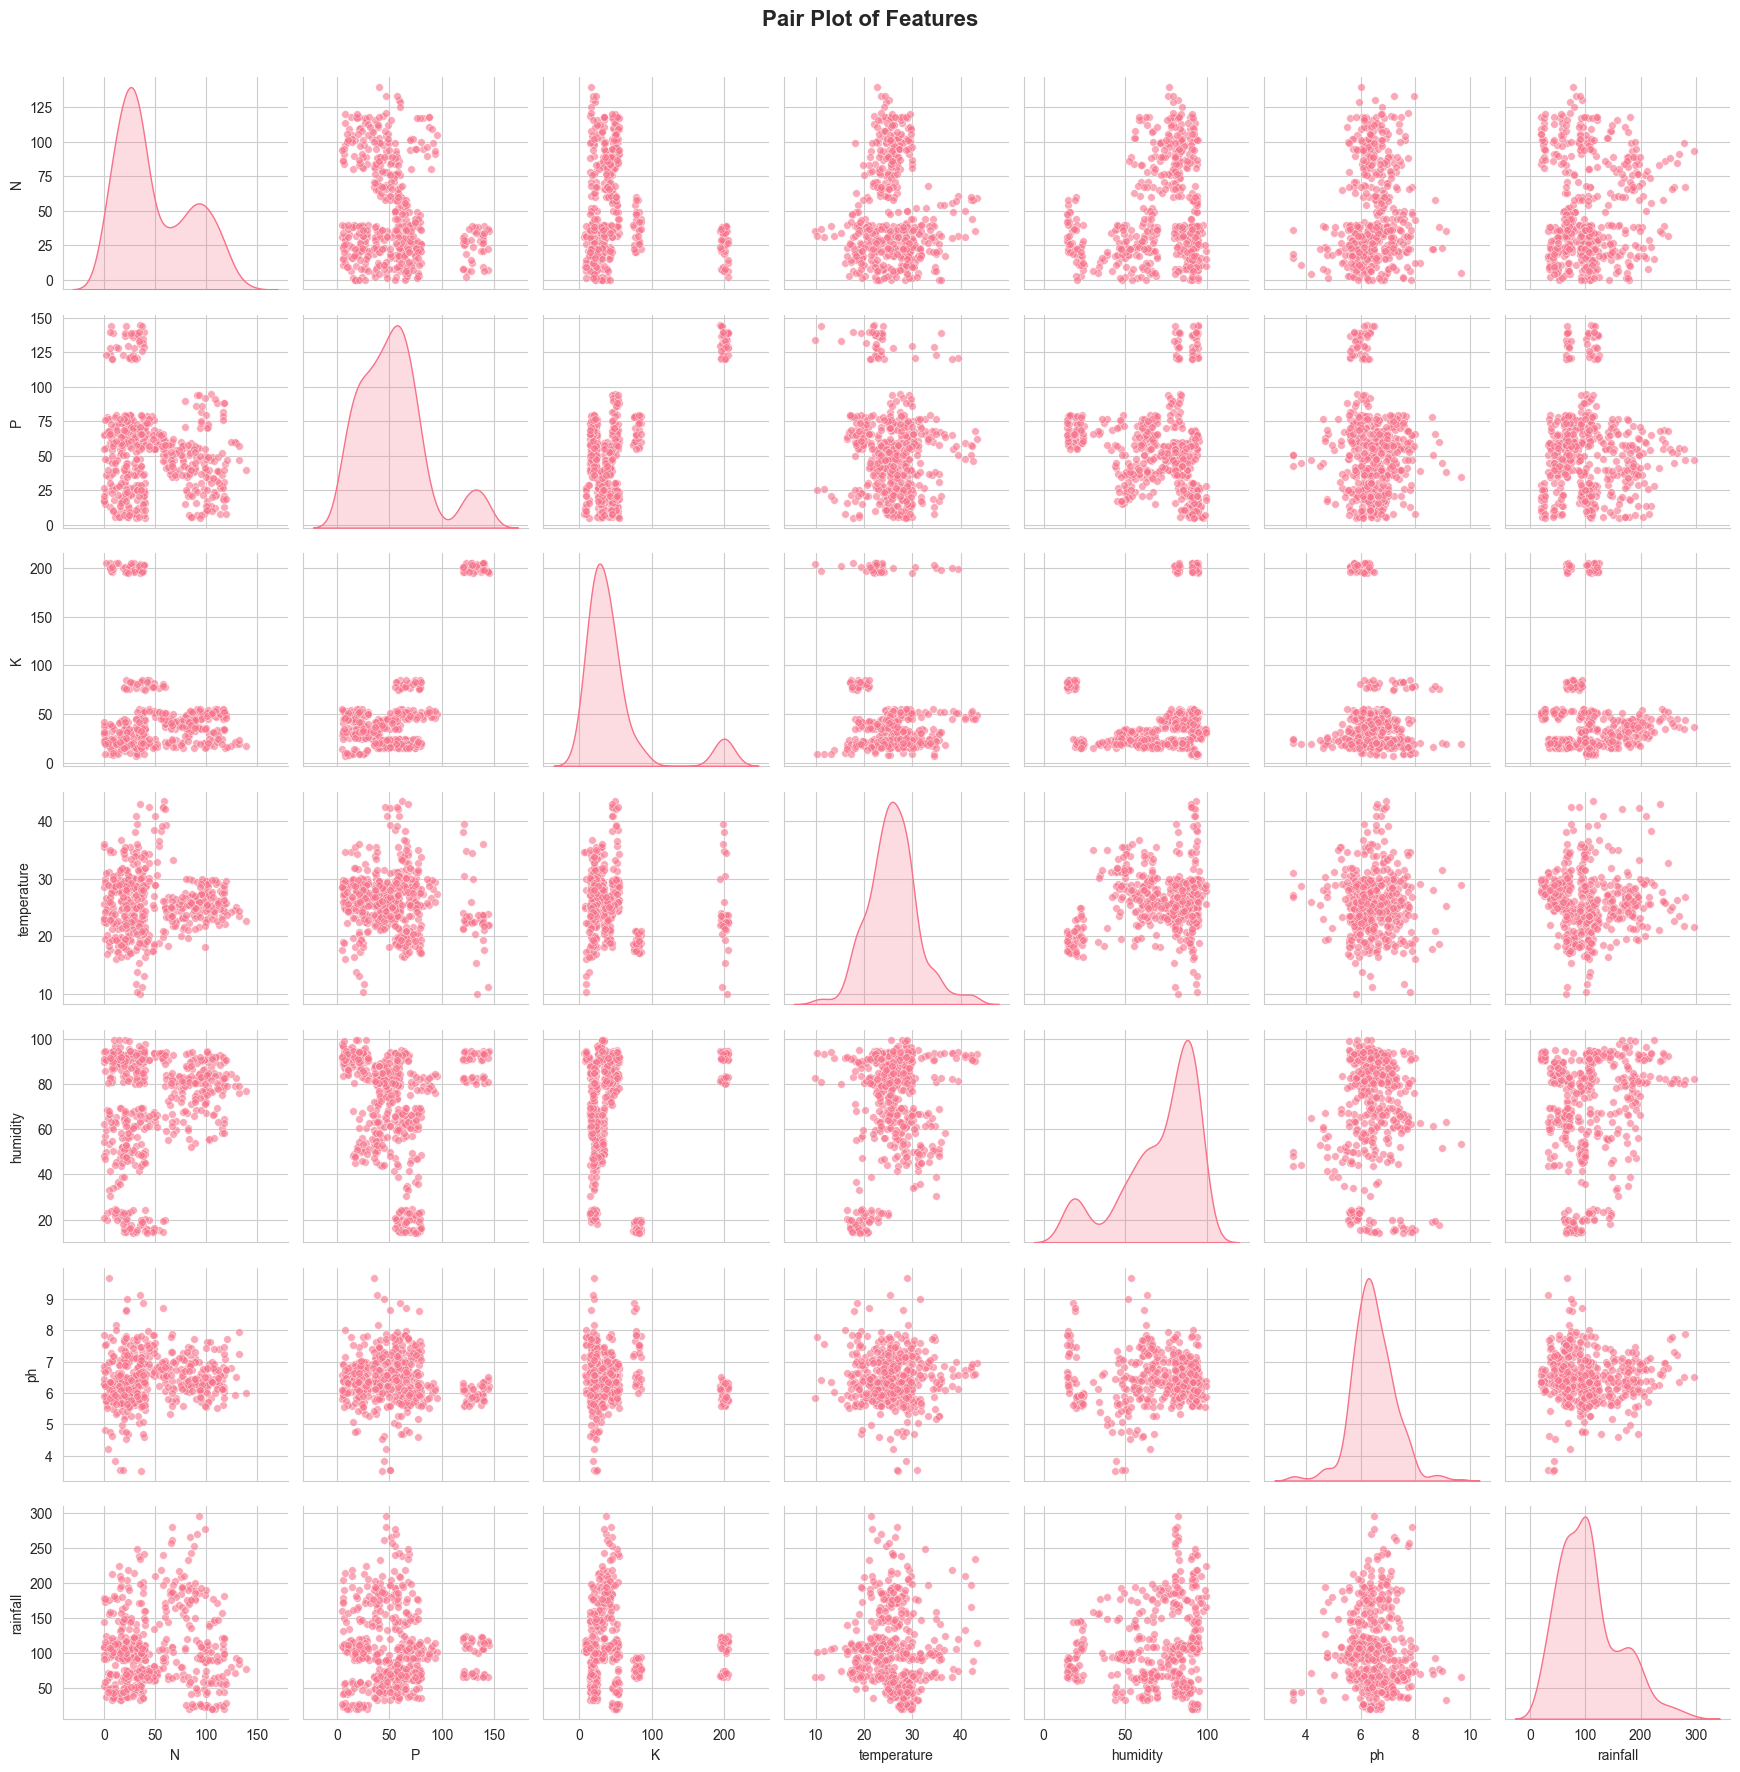

In [20]:
print("\n Creating pair plot with sample of 500 records")
pairplot=sns.pairplot(sample_df[features],diag_kind="kde",plot_kws={"alpha":0.6,"s":30})
pairplot.figure.suptitle("Pair Plot of Features",fontsize=16,fontweight="bold",y=1.01)
plt.tight_layout()
plt.savefig("../data/visualizations/04_pairplot_features.png",dpi=300,bbox_inches="tight")
print("\nSaved: 04_pairplot_features.png")
plt.show()

# Visualization 5 - Crop Distribution (Bar Chart)

In [21]:
print("Visualization 5: Target Variable Distribution")

Visualization 5: Target Variable Distribution


In [22]:
crop_counts=df["label"].value_counts()


Saved: 05_crop_distribution.png


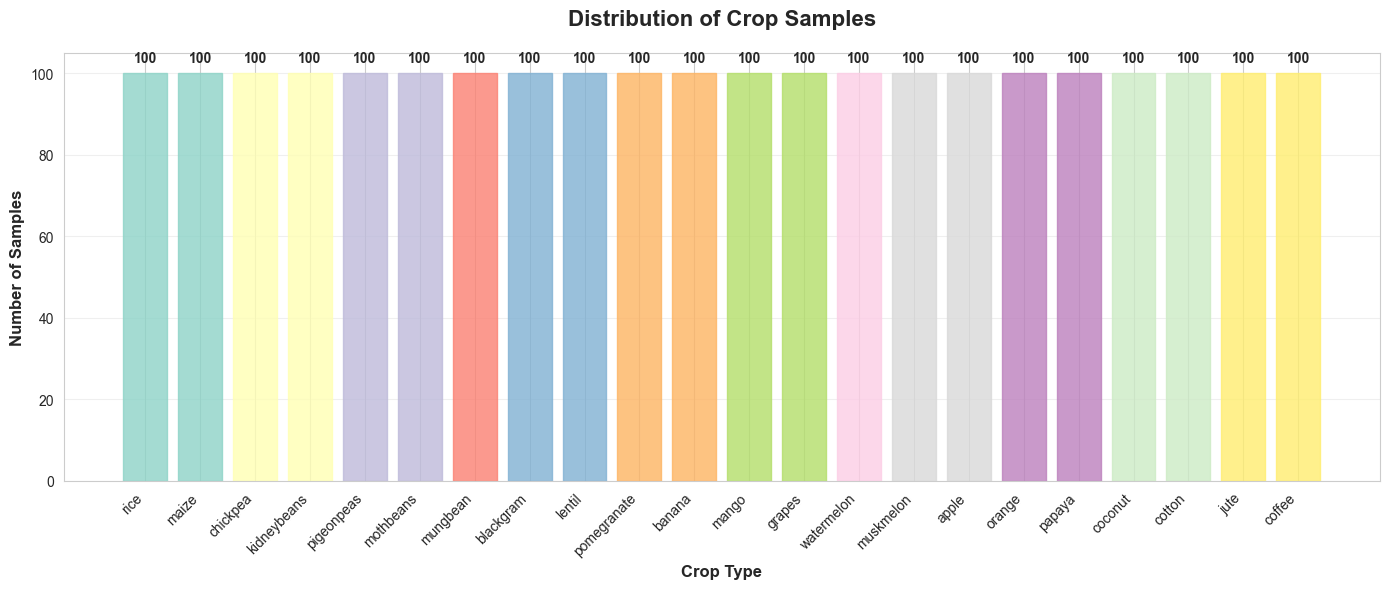


Total Crops:22
Most common: rice (100 samples)
Least common: coffee (100 samples)


In [32]:
plt.figure(figsize=(14,6))
bars=plt.bar(crop_counts.index,crop_counts.values,color="steelblue",edgecolor="black",alpha=0.8)

colors_crops=plt.cm.Set3(np.linspace(0,1,len(crop_counts)))
for bar,color in zip(bars,colors_crops):
    bar.set_color(color)

plt.title("Distribution of Crop Samples",fontsize=16,fontweight="bold",pad=20)
plt.xlabel("Crop Type",fontsize=12,fontweight="bold")
plt.ylabel("Number of Samples",fontsize=12,fontweight="bold")
plt.xticks(rotation=45,ha="right")
plt.grid(axis="y",alpha=0.3)


for i,(crop,count) in enumerate(crop_counts.items()):
    plt.text(i,count+2,str(count),ha="center",va="bottom",fontweight="bold")

plt.tight_layout()
plt.savefig("../data/visualizations/05_crop_distribution.png",dpi=300,bbox_inches="tight")
print("\nSaved: 05_crop_distribution.png")
plt.show()


print(f"\nTotal Crops:{len(crop_counts)}")
print(f"Most common: {crop_counts.index[0]} ({crop_counts.values[0]} samples)")
print(f"Least common: {crop_counts.index[-1]} ({crop_counts.values[-1]} samples)")

# Visualization 6 - Feature Distribution by Crop (Violin Plots)

In [38]:
print("VISUALIZATION 6: FEATURE DISTRIBUTIONS BY CROP (Violin Plots)")

VISUALIZATION 6: FEATURE DISTRIBUTIONS BY CROP (Violin Plots)


In [39]:
important_features=["N", "P", "K", "rainfall", "temperature"]


 Saved: 06_feature_by_crop_violin.png


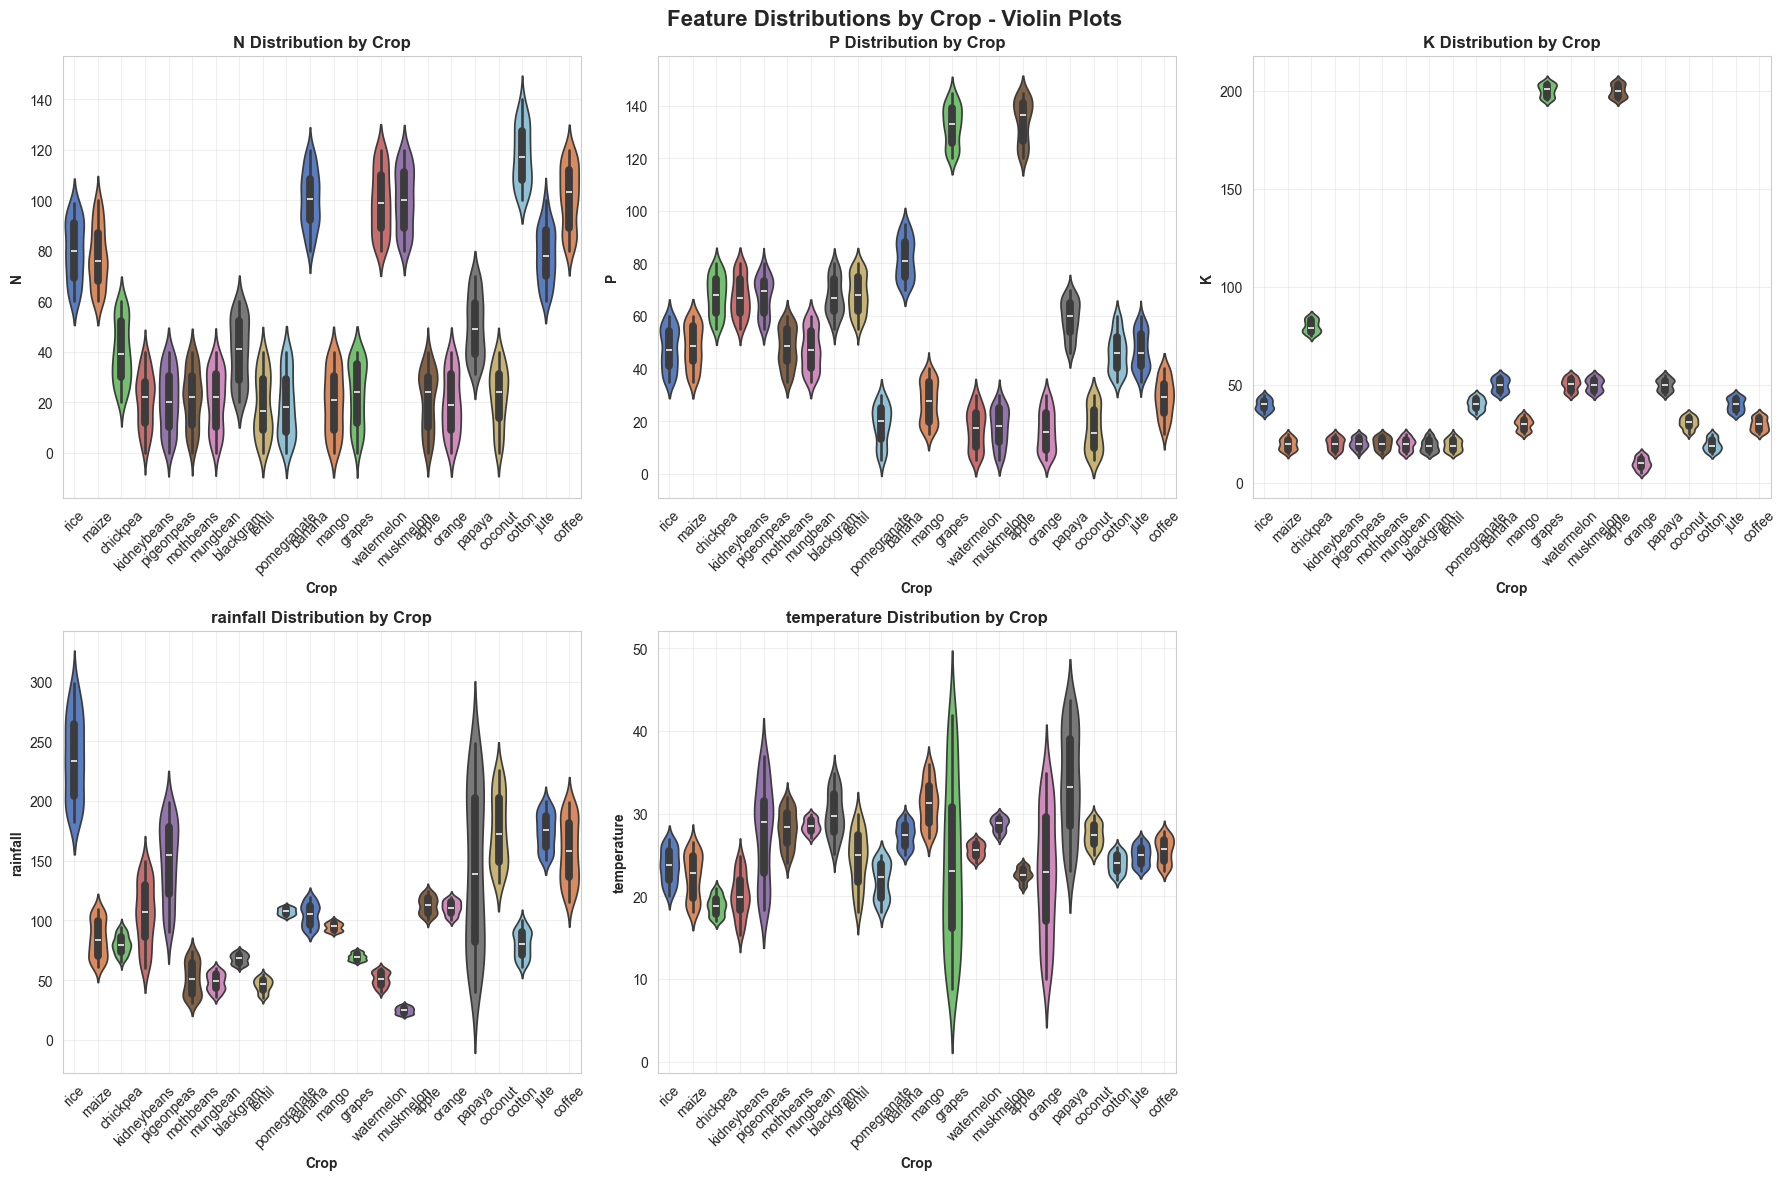

In [49]:
fig,axes=plt.subplots(2,3,figsize=(18,12))
fig.suptitle("Feature Distributions by Crop - Violin Plots",fontsize=16,fontweight="bold")

for idx,feature in enumerate(important_features):
    row=idx//3
    col=idx%3
    
    sns.violinplot(data=df,x="label",y=feature,ax=axes[row,col],palette="muted",legend=False,hue="label",split=False)
    axes[row,col].set_title(f"{feature} Distribution by Crop",fontweight="bold",fontsize=12)
    axes[row,col].set_xlabel("Crop",fontweight="bold")
    axes[row,col].set_ylabel(feature,fontweight="bold")
    axes[row,col].tick_params(axis="x",rotation=45)
    axes[row,col].grid(True,alpha=0.3)

for ax in axes.flatten()[len(important_features):]:
    ax.set_visible(False)

plt.tight_layout()
plt.savefig('../data/visualizations/06_feature_by_crop_violin.png', dpi=300, bbox_inches='tight')
print("\n Saved: 06_feature_by_crop_violin.png")
plt.show()

# Visualization 7 - NPK Requirements by Crop (Grouped Bar Chart)

In [50]:
print("VISUALIZATION 7: NPK REQUIREMENTS BY CROP")

VISUALIZATION 7: NPK REQUIREMENTS BY CROP


In [51]:
npk_by_crop=df.groupby("label")[["N","P","K"]].mean()


Saved: 07_npk_by_crop.png


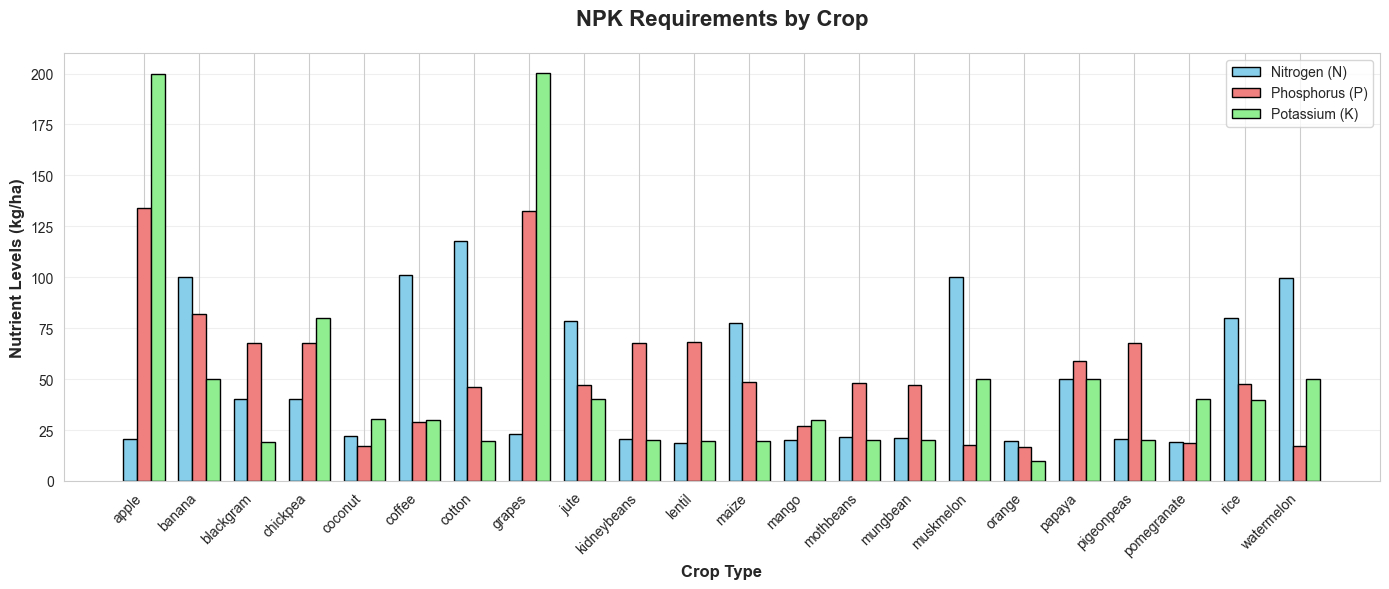


NPK Requirements Summary:
                  N       P       K
label                              
apple         20.80  134.22  199.89
banana       100.23   82.01   50.05
blackgram     40.02   67.47   19.24
chickpea      40.09   67.79   79.92
coconut       21.98   16.93   30.59
coffee       101.20   28.74   29.94
cotton       117.77   46.24   19.56
grapes        23.18  132.53  200.11
jute          78.40   46.86   39.99
kidneybeans   20.75   67.54   20.05
lentil        18.77   68.36   19.41
maize         77.76   48.44   19.79
mango         20.07   27.18   29.92
mothbeans     21.44   48.01   20.23
mungbean      20.99   47.28   19.87
muskmelon    100.32   17.72   50.08
orange        19.58   16.55   10.01
papaya        49.88   59.05   50.04
pigeonpeas    20.73   67.73   20.29
pomegranate   18.87   18.75   40.21
rice          79.89   47.58   39.87
watermelon    99.42   17.00   50.22


In [59]:
fig,ax=plt.subplots(figsize=(14,6))
x=np.arange(len(npk_by_crop))
width=0.25

bars1 = ax.bar(x - width, npk_by_crop['N'], width, label='Nitrogen (N)',color='skyblue',edgecolor='black')
bars2 = ax.bar(x, npk_by_crop['P'], width, label='Phosphorus (P)', color='lightcoral', edgecolor='black')
bars3 = ax.bar(x + width, npk_by_crop['K'], width, label='Potassium (K)',color='lightgreen',edgecolor='black')

ax.set_xlabel("Crop Type",fontweight="bold",fontsize=12)
ax.set_ylabel("Nutrient Levels (kg/ha)",fontweight="bold",fontsize=12)
ax.set_title("NPK Requirements by Crop",fontsize=16,fontweight="bold",pad=20)
ax.set_xticks(x)
ax.set_xticklabels(npk_by_crop.index,rotation=45,ha="right")
ax.legend()
ax.grid(axis="y",alpha=0.3)

plt.tight_layout()
plt.savefig('../data/visualizations/07_npk_by_crop.png', dpi=300, bbox_inches='tight')
print("\nSaved: 07_npk_by_crop.png")
plt.show()

print("\nNPK Requirements Summary:")
print(npk_by_crop)

# Visualization 8 - Temperature & Humidity Scatter Plot by Crop

In [60]:
print("VISUALIZATION 8: TEMPERATURE vs HUMIDITY BY CROP")

VISUALIZATION 8: TEMPERATURE vs HUMIDITY BY CROP



 Saved: 08_temp_humidity_scatter.png


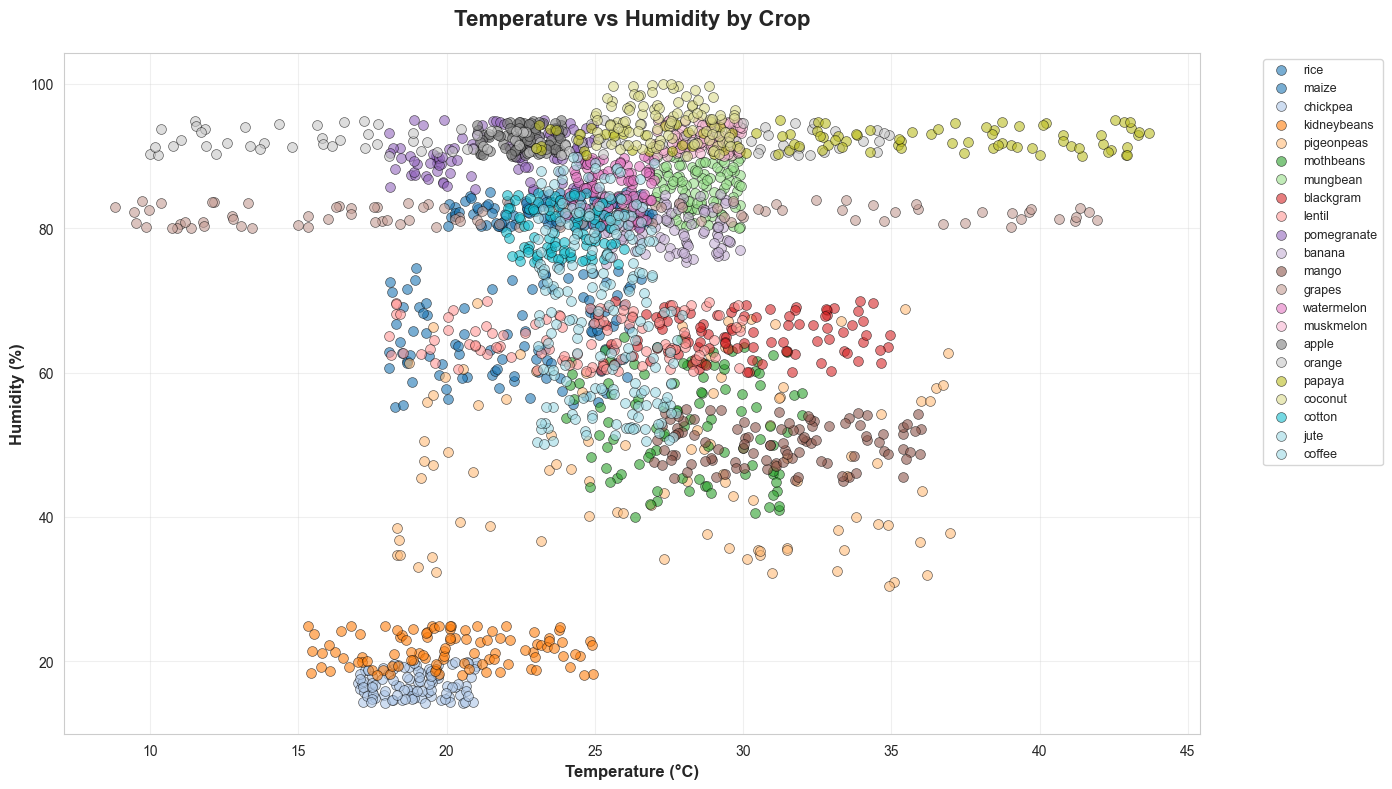

In [62]:
plt.figure(figsize=(14,8))
crops=df["label"].unique()
colors_scatter=plt.cm.tab20(np.linspace(0,1,len(crops)))

for crop,color in zip(crops,colors_scatter):
    crop_data=df[df["label"]==crop]
    plt.scatter(crop_data["temperature"],crop_data["humidity"],label=crop,alpha=0.6,s=50,color=color,edgecolors="black",linewidth=0.5)
    
plt.xlabel("Temperature (°C)",fontsize=12,fontweight="bold")
plt.ylabel("Humidity (%)",fontsize=12,fontweight="bold")
plt.title("Temperature vs Humidity by Crop",fontsize=16,fontweight="bold",pad=20)

plt.legend(bbox_to_anchor=(1.05,1),loc="upper left",fontsize=9,ncol=1)
plt.grid(True,alpha=0.3)
plt.tight_layout()

plt.savefig('../data/visualizations/08_temp_humidity_scatter.png', dpi=300, bbox_inches='tight')
print("\n Saved: 08_temp_humidity_scatter.png")
plt.show()

# Visualization 9 - pH Distribution by Crop

In [64]:
print("VISUALIZATION 9: pH DISTRIBUTION BY CROP")

VISUALIZATION 9: pH DISTRIBUTION BY CROP


In [71]:
ph_by_crop=df.groupby("label")["ph"].mean().sort_values()


Saved: 09_ph_by_crop.png


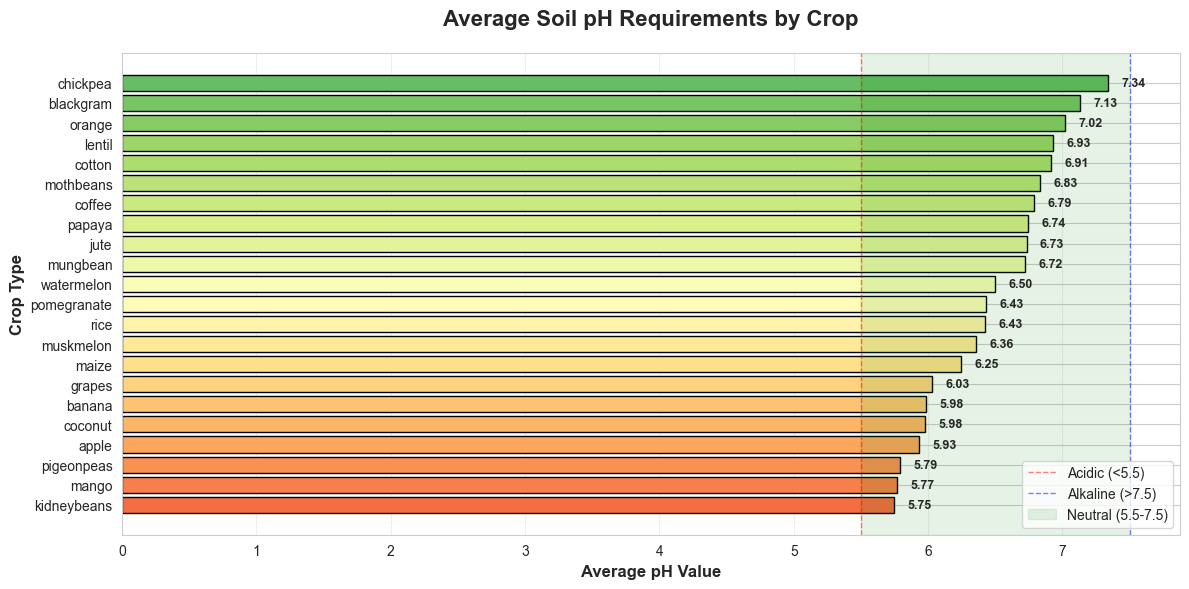

In [76]:
plt.figure(figsize=(12,6))
colors_ph=plt.cm.RdYlGn(np.linspace(0.2,0.8,len(ph_by_crop)))
bars=plt.barh(ph_by_crop.index,ph_by_crop.values,color=colors_ph,edgecolor="black")

plt.xlabel('Average pH Value', fontweight='bold', fontsize=12)
plt.ylabel('Crop Type', fontweight='bold', fontsize=12)
plt.title('Average Soil pH Requirements by Crop', fontsize=16, fontweight='bold', pad=20)

plt.axvline(x=5.5,color="red",linestyle="--",linewidth=1,alpha=0.5,label="Acidic (<5.5)")
plt.axvline(x=7.5,color="blue",linestyle="--",linewidth=1,alpha=0.5,label="Alkaline (>7.5)")
plt.axvspan(5.5,7.5,alpha=0.1,color="green",label="Neutral (5.5-7.5)")


for i,(crop,ph_val) in enumerate(ph_by_crop.items()):
    plt.text(ph_val+0.1,i,f"{ph_val:.2f}",va="center",fontweight="bold",fontsize=9)
    
plt.legend(loc="lower right")
plt.grid(axis="x",alpha=0.3)
plt.tight_layout()
plt.savefig('../data/visualizations/09_ph_by_crop.png', dpi=300, bbox_inches='tight')
print("\nSaved: 09_ph_by_crop.png")
plt.show()

# Visualization 10 - Rainfall Requirements by Crop

In [77]:
print("VISUALIZATION 10: RAINFALL REQUIREMENTS BY CROP")

VISUALIZATION 10: RAINFALL REQUIREMENTS BY CROP


In [83]:
rainfall_by_crop=df.groupby("label")["rainfall"].mean().sort_values(ascending=False)

In [84]:
rainfall_by_crop

label
rice           236.181114
coconut        175.686646
jute           174.792798
coffee         158.066295
pigeonpeas     149.457564
papaya         142.627839
apple          112.654779
orange         110.474969
pomegranate    107.528442
kidneybeans    105.919778
banana         104.626980
mango           94.704515
maize           84.766988
cotton          80.398043
chickpea        80.058977
grapes          69.611829
blackgram       67.884151
mothbeans       51.198487
watermelon      50.786219
mungbean        48.403601
lentil          45.680454
muskmelon       24.689952
Name: rainfall, dtype: float64


Saved: 10_rainfall_by_crop.png


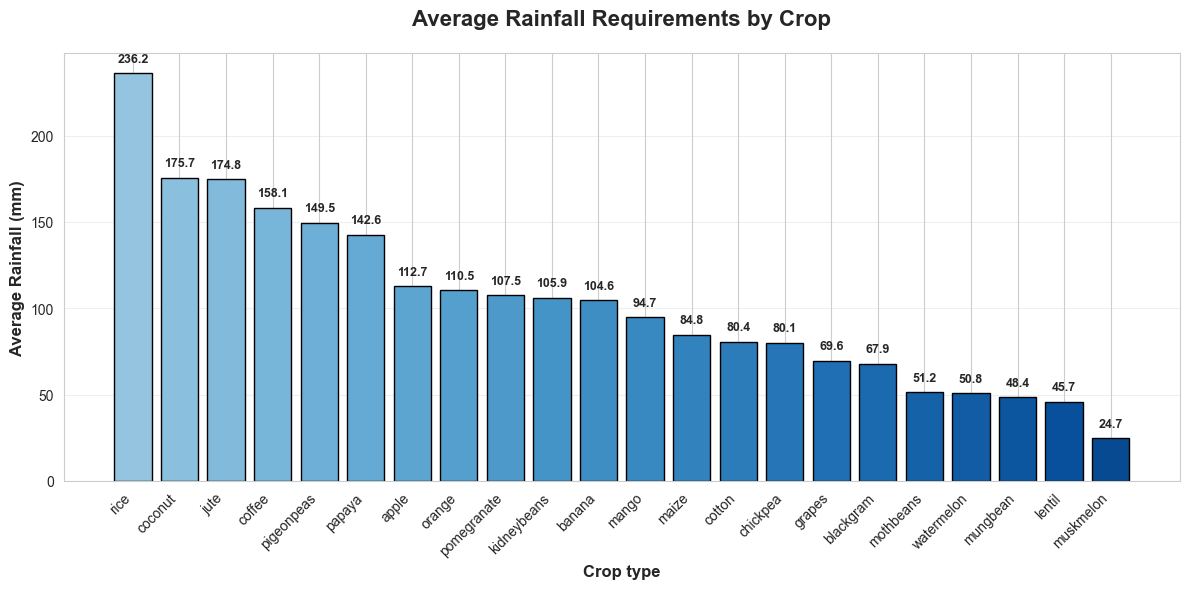


Top 5 Water-Intensive Crops:
label
rice          236.181114
coconut       175.686646
jute          174.792798
coffee        158.066295
pigeonpeas    149.457564
Name: rainfall, dtype: float64

Top 5 Drought-Resistant Crops:
label
mothbeans     51.198487
watermelon    50.786219
mungbean      48.403601
lentil        45.680454
muskmelon     24.689952
Name: rainfall, dtype: float64


In [91]:
plt.figure(figsize=(12,6))
colors_rain=plt.cm.Blues(np.linspace(0.4,0.9,len(rainfall_by_crop)))
bars=plt.bar(rainfall_by_crop.index,rainfall_by_crop.values,color=colors_rain,edgecolor="black")

plt.xlabel("Crop type",fontweight="bold",fontsize=12)
plt.ylabel("Average Rainfall (mm)",fontweight="bold",fontsize=12)
plt.title("Average Rainfall Requirements by Crop",fontsize=16,fontweight="bold",pad=20)
plt.xticks(rotation=45,ha="right")

for i,(crop,rain_val) in enumerate(rainfall_by_crop.items()):
    plt.text(i,rain_val+5,f"{rain_val:.1f}",ha="center",va="bottom",fontweight="bold",fontsize=9)

plt.grid(axis="y",alpha=0.3)
plt.tight_layout()
plt.savefig('../data/visualizations/10_rainfall_by_crop.png', dpi=300, bbox_inches='tight')
print("\nSaved: 10_rainfall_by_crop.png")
plt.show()

print("\nTop 5 Water-Intensive Crops:")
print(rainfall_by_crop.head())
print("\nTop 5 Drought-Resistant Crops:")
print(rainfall_by_crop.tail())

# Visualization 11 - Feature Importance (Variance Analysis)

In [92]:
print("VISUALIZATION 11: FEATURE VARIANCE ANALYSIS")

VISUALIZATION 11: FEATURE VARIANCE ANALYSIS


In [96]:
feature_variance=df[features].var().sort_values(ascending=False)

In [99]:
print("\nFeature Variance Rankings:")
print(feature_variance)


Feature Variance Rankings:
rainfall       3020.424469
K              2565.212869
N              1362.889537
P              1088.068460
humidity        495.677307
temperature      25.641550
ph                0.598980
dtype: float64



Saved: 11_feature_variance.png


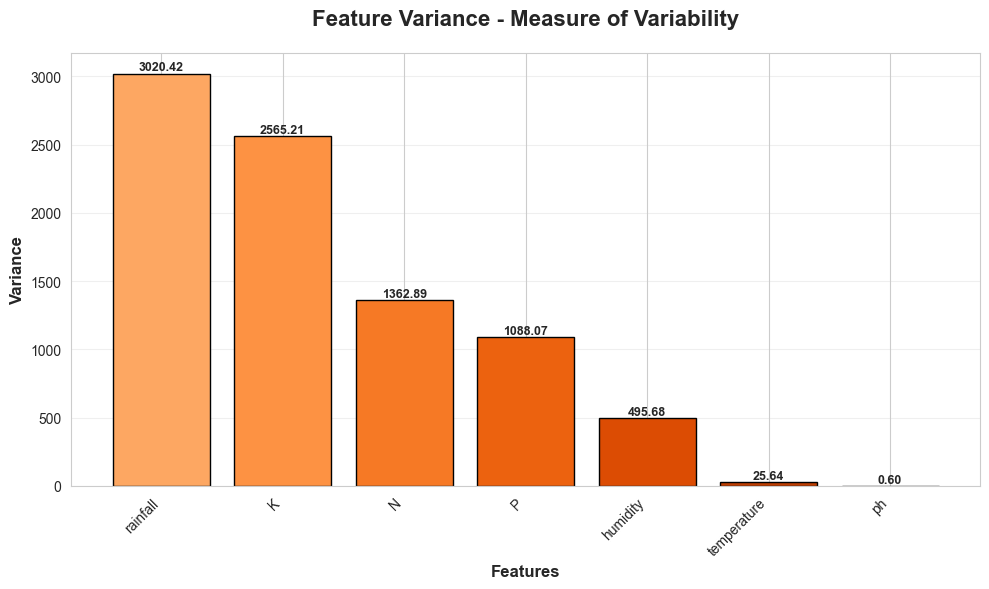

In [100]:
plt.figure(figsize=(10,6))
colors_var=plt.cm.Oranges(np.linspace(0.4,0.9,len(feature_variance)))
bars=plt.bar(feature_variance.index,feature_variance.values,color=colors_var,edgecolor="black")

plt.xlabel('Features', fontweight='bold', fontsize=12)
plt.ylabel('Variance', fontweight='bold', fontsize=12)
plt.title('Feature Variance - Measure of Variability', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')

for i,(feat,var_val) in enumerate(feature_variance.items()):
    plt.text(i,var_val+0.5,f"{var_val:.2f}",ha="center",va="bottom",fontweight="bold",fontsize=9)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../data/visualizations/11_feature_variance.png', dpi=300, bbox_inches='tight')
print("\nSaved: 11_feature_variance.png")
plt.show()